In [2]:
import pandas as pd

In [3]:
singleTrips = pd.read_csv("allTrips.csv", index_col = 0)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
singleTrips.head()

,암호화카드번호,교통수단CD,버스노선ID,차량ID,승차일시,하차일시,승차역ID,하차역ID,구분
1,900079697651,500.0,41031040.0,141701792.0,2.018070e+13,2.018070e+13,4117280.0,4117269.0,단일
2,900079698254,500.0,41031121.0,141701843.0,2.018070e+13,2.018070e+13,4199619.0,4107936.0,단일
3,900079699257,500.0,41031013.0,141701450.0,2.018070e+13,2.018070e+13,4108130.0,4116717.0,단일
4,900079701419,530.0,41020001.0,141703985.0,2.018070e+13,2.018070e+13,4100122.0,4116848.0,단일
5,900079701419,530.0,41020001.0,141703953.0,2.018070e+13,2.018070e+13,4100098.0,4100121.0,단일


In [5]:
travels = pd.read_csv("travelData.csv", index_col=0)

In [7]:
travels.head()

,승차역ID1,최종하차역ID,최초승차일시,최종하차일시,총통행거리,총탑승시간,환승횟수,총이용금액,사용자구분
0,4116828.0,4116708.0,20180701052543,20180701064826,11170,25,2,1350,1
1,4117280.0,4117269.0,20180701072156,20180701072520,1700,3,1,1250,1
2,4199619.0,4107936.0,20180701123653,20180701134223,23180,66,1,1550,1
3,4108130.0,4116717.0,20180701224424,20180701224543,500,1,1,1250,1
4,4100122.0,4116848.0,20180701085058,20180701085910,3240,8,1,2050,1


In [6]:
from collections import Counter

In [13]:
Counter(singleTrips[singleTrips['하차역ID']<100000]['하차역ID']).most_common()

[(1713.0, 24708),
 (1869.0, 13141),
 (1716.0, 8793),
 (1711.0, 5115),
 (1846.0, 5077),
 (1871.0, 4841),
 (1719.0, 3996),
 (4316.0, 3245),
 (1712.0, 3188),
 (1868.0, 3100),
 (1867.0, 3026),
 (1858.0, 2568),
 (1457.0, 2527),
 (1717.0, 2506),
 (1855.0, 2418),
 (1706.0, 2001),
 (1715.0, 1993),
 (1862.0, 1928),
 (222.0, 1786),
 (1724.0, 1484),
 (1708.0, 1469),
 (4307.0, 1463),
 (1854.0, 1276),
 (1872.0, 1267),
 (1702.0, 1243),
 (1870.0, 1240),
 (4311.0, 1199),
 (1857.0, 1167),
 (1707.0, 1144),
 (4315.0, 1137),
 (1859.0, 1131),
 (1865.0, 1119),
 (4317.0, 1105),
 (4125.0, 1078),
 (1866.0, 1040),
 (4314.0, 1040),
 (4318.0, 1023),
 (232.0, 992),
 (433.0, 990),
 (1704.0, 984),
 (1710.0, 930),
 (2748.0, 917),
 (219.0, 912),
 (1856.0, 852),
 (1718.0, 828),
 (1006.0, 823),
 (1853.0, 800),
 (2823.0, 795),
 (1709.0, 773),
 (1714.0, 719),
 (4313.0, 712),
 (223.0, 676),
 (1729.0, 663),
 (1456.0, 644),
 (1455.0, 625),
 (1754.0, 622),
 (220.0, 602),
 (221.0, 598),
 (1701.0, 558),
 (239.0, 556),
 (1722.0,

In [14]:
subways = singleTrips[singleTrips['버스노선ID'] == 0]

In [15]:
subwayIn = Counter(subways['승차역ID']).most_common()

In [16]:
subwayOut = Counter(singleTrips[singleTrips['하차역ID']<100000]['하차역ID']).most_common()

In [18]:
sI = pd.DataFrame(subwayIn)

In [19]:
sI.columns = ['id', 'pops']

In [20]:
sO = pd.DataFrame(subwayOut)
sO.columns = ['id', 'pops']

In [24]:
merged = sI.merge(sO, how='outer', on='id')

In [32]:
merged['sum'] = merged['pops_x'] + merged['pops_y']

In [31]:
merged = merged.fillna(0)

In [34]:
merged.to_excel('지하철 이용통계 업데이트.xlsx')

In [15]:
subwayOut = Counter(subways['하차역ID']).most_common()

In [19]:
pd.DataFrame(subwayIn).to_excel("지하철 이용통계.xlsx")

In [25]:
travels

,승차역ID1,최종하차역ID,최초승차일시,최종하차일시,총통행거리,총탑승시간,환승횟수,총이용금액,사용자구분
0,4116828.0,4116708.0,20180701052543,20180701064826,11170,25,2,1350,1
1,4117280.0,4117269.0,20180701072156,20180701072520,1700,3,1,1250,1
2,4199619.0,4107936.0,20180701123653,20180701134223,23180,66,1,1550,1
3,4108130.0,4116717.0,20180701224424,20180701224543,500,1,1,1250,1
4,4100122.0,4116848.0,20180701085058,20180701085910,3240,8,1,2050,1
...,...,...,...,...,...,...,...,...,...
1048506,4108165.0,4108172.0,20180704145538,20180704145955,1210,4,1,1740,4
1048553,4197552.0,4199455.0,20180704161933,20180704162223,950,3,1,2500,1
1048553,4197552.0,4199455.0,20180704161933,20180704162223,950,3,1,2500,1
1048557,4176974.0,4130401.0,20180704162544,20180704164512,4660,19,1,2500,1


In [26]:
stations = pd.read_excel("PJT001_stations_table.xlsx")

In [31]:
stations.dropna(subset= ['이비카드정류장ID'], inplace=True)

In [32]:
stations

,Unnamed: 0,표준정류장ID,시군명,정류소명,정류소영문명,정류소번호,중앙차로여부,관할관청,위치,WGS84위도,WGS84경도,모바일정류장ID,이비카드정류장ID
37,37,116000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[None None None None None None None None None ...,4101368.0
38,38,116000002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[None None None None None None None None None ...,4101367.0
39,39,116000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[None None None None None None None None None ...,4101366.0
40,40,116000004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[None None None None None None None None None ...,4107394.0
41,41,116000005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[None None None None None None None None None ...,4101364.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38377,38377,224001022,시흥시,3Z,NaN,25964.0,NaN,NaN,NaN,37.320600,126.707133,[None None None None None None None None None ...,4122060.0
38378,38378,224001023,시흥시,아남중전기,NaN,25963.0,NaN,NaN,NaN,37.319967,126.710483,[None None None None None None None None None ...,4122059.0
38389,38389,236001057,포천시,군내어린이집,Gunnae Childcare Center,41276.0,노변정류장,경기도 포천시,경기도 포천시 군내면,37.858133,127.215667,[None None None None None None None None None ...,4121230.0
38398,38398,236001079,포천시,선단동주민센터,Seondan-dong Community Center,40492.0,노변정류장,경기도 포천시,경기도 포천시 선단동,37.854483,127.160200,[None None None None None None None None None ...,4173395.0


In [34]:
stations['이비카드정류장ID'].unique().shape

(25967,)

In [35]:
slicedStations = stations[['이비카드정류장ID', '시군명', '정류소명', '표준정류장ID', '정류소번호', 'WGS84위도', 'WGS84경도']]

In [40]:
slicedStations.dropna(subset=['정류소명'], inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
slicedStations

,이비카드정류장ID,시군명,정류소명,표준정류장ID,정류소번호,WGS84위도,WGS84경도
105,4103451.0,안양시,삼성빌라,208000192,9095.0,37.401633,126.910867
157,4115377.0,김포시,유현마을.신동아아파트,232000001,35251.0,37.596333,126.721300
158,4118001.0,김포시,옹주물,232000014,35364.0,37.634867,126.683083
159,4116342.0,김포시,우저서원(대성주유소),232000017,35215.0,37.625317,126.696900
160,4116344.0,김포시,홈플러스,232000018,35218.0,37.623533,126.697650
...,...,...,...,...,...,...,...
38377,4122060.0,시흥시,3Z,224001022,25964.0,37.320600,126.707133
38378,4122059.0,시흥시,아남중전기,224001023,25963.0,37.319967,126.710483
38389,4121230.0,포천시,군내어린이집,236001057,41276.0,37.858133,127.215667
38398,4173395.0,포천시,선단동주민센터,236001079,40492.0,37.854483,127.160200


In [57]:
maeul = pd.read_csv("references/경기도_화성시_마을버스현황_20190502.csv", encoding='cp949')

In [58]:
extra = pd.read_excel("따로받은정류장들.xlsx")

In [60]:
maeul.head()

,운수사,사업자ID,노선ID,노선번호,순번,정류소ID,정류소번호,정류소명,구간거리,위도,경도,TM_X,TM_Y
0,(화성)금오운수,4132400,41324001,17,0,4151651,36345.0,병점역사거리,0,37.206950,127.035617,203094.688937,411677.665058
1,(화성)금오운수,4132400,41324001,17,1,4100049,36351.0,홈플러스.벌말초교,466,37.203300,127.038133,203318.700559,411273.478370
2,(화성)금오운수,4132400,41324001,17,2,4170352,37738.0,한신아파트,434,37.203317,127.042017,203662.781501,411274.464307
3,(화성)금오운수,4132400,41324001,17,3,4199076,37683.0,구봉산근린공원,267,37.203617,127.044217,203857.465936,411307.455167
4,(화성)금오운수,4132400,41324001,17,4,4119339,55295.0,성호아파트후문,317,37.200850,127.044533,203886.428843,411000.371638


In [61]:
maeulSliced = maeul[['정류소ID', '정류소번호', '정류소명', '위도', '경도']]

In [63]:
extra.head()

,정류장ID,시군구,정류장명,ARS번호,X,Y
0,4100048,화성시,신창미션힐.송화초교,36350.0,37.20378,127.03822
1,4100049,화성시,홈플러스.벌말초교,36351.0,37.20330,127.03813
2,4100050,화성시,동탄1동행정복지센터,37749.0,37.20685,127.07235
3,4100051,화성시,동부출장소.병점초등학교,36342.0,37.20878,127.03443
4,4100052,화성시,병점입구.병점육교.화남아파트,36341.0,37.21067,127.03287


In [65]:
maeulSliced.columns = ['정류장ID', 'ARS번호', '정류장명', 'X', "Y"]

In [67]:
maeulSliced['시군구'] = '화성시'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
fromOutside = pd.concat([extra, maeulSliced])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [70]:
fromOutside.head()

,ARS번호,X,Y,시군구,정류장ID,정류장명
0,36350.0,37.20378,127.03822,화성시,4100048,신창미션힐.송화초교
1,36351.0,37.20330,127.03813,화성시,4100049,홈플러스.벌말초교
2,37749.0,37.20685,127.07235,화성시,4100050,동탄1동행정복지센터
3,36342.0,37.20878,127.03443,화성시,4100051,동부출장소.병점초등학교
4,36341.0,37.21067,127.03287,화성시,4100052,병점입구.병점육교.화남아파트


In [71]:
slicedStations.head()

,이비카드정류장ID,시군명,정류소명,표준정류장ID,정류소번호,WGS84위도,WGS84경도
105,4103451.0,안양시,삼성빌라,208000192,9095.0,37.401633,126.910867
157,4115377.0,김포시,유현마을.신동아아파트,232000001,35251.0,37.596333,126.721300
158,4118001.0,김포시,옹주물,232000014,35364.0,37.634867,126.683083
159,4116342.0,김포시,우저서원(대성주유소),232000017,35215.0,37.625317,126.696900
160,4116344.0,김포시,홈플러스,232000018,35218.0,37.623533,126.697650


In [72]:
slicedStations.columns = ['정류장ID', '시군구', '정류장명', '표준정류장ID', 'ARS번호' ,"X", "Y"]

In [77]:
concatenated = pd.concat([fromOutside, slicedStations], join='inner')

In [84]:
concatenated[concatenated.duplicated(subset=['정류장ID'], keep=False)].sort_values("정류장ID")

,정류장ID,시군구,정류장명,X,Y,ARS번호
2070,4100013.0,오산시,원영화남아파트,37.129880,127.067650,24097.0
13178,4100013.0,오산시,원영화남아파트,37.129883,127.067650,24097.0
2071,4100014.0,오산시,원영화남아파트,37.129570,127.067330,24099.0
13179,4100014.0,오산시,원영화남아파트,37.129567,127.067333,24099.0
13180,4100016.0,오산시,갈곶동.동부아파트,37.132850,127.069217,24118.0
...,...,...,...,...,...,...
1303,8020350.0,화성시,수원역.역전시장,37.265083,127.001817,3023.0
3027,8020350.0,화성시,수원역.역전시장,37.265083,127.001817,3023.0
1488,8020350.0,화성시,수원역.역전시장,37.265083,127.001817,3023.0
1419,8020350.0,화성시,수원역.역전시장,37.265083,127.001817,3023.0


In [80]:
concatenated = concatenated[['정류장ID', '시군구', '정류장명', 'X', "Y", "ARS번호"]]

In [87]:
uniques = concatenated.drop_duplicates(subset=['정류장ID'])

In [88]:
uniques

,정류장ID,시군구,정류장명,X,Y,ARS번호
0,4100048.0,화성시,신창미션힐.송화초교,37.203780,127.038220,36350.0
1,4100049.0,화성시,홈플러스.벌말초교,37.203300,127.038130,36351.0
2,4100050.0,화성시,동탄1동행정복지센터,37.206850,127.072350,37749.0
3,4100051.0,화성시,동부출장소.병점초등학교,37.208780,127.034430,36342.0
4,4100052.0,화성시,병점입구.병점육교.화남아파트,37.210670,127.032870,36341.0
...,...,...,...,...,...,...
38377,4122060.0,시흥시,3Z,37.320600,126.707133,25964.0
38378,4122059.0,시흥시,아남중전기,37.319967,126.710483,25963.0
38389,4121230.0,포천시,군내어린이집,37.858133,127.215667,41276.0
38398,4173395.0,포천시,선단동주민센터,37.854483,127.160200,40492.0


In [89]:
uniques.to_csv("확보된 모든 정류장 위치.csv", index=False)

In [92]:
busCompanies = maeul.drop_duplicates(subset=['노선ID'])

In [94]:
busCompanies = busCompanies[['노선ID', '노선번호', '운수사', '사업자ID']]

In [95]:
busCompanies

,노선ID,노선번호,운수사,사업자ID
0,41324001,17,(화성)금오운수,4132400
50,41324002,27,(화성)금오운수,4132400
98,41324003,27-1,(화성)금오운수,4132400
141,41324004,27-2,(화성)금오운수,4132400
190,41324005,17-1,(화성)금오운수,4132400
...,...,...,...,...
6429,41319039,공영4(돌내.형도),(화성)화성순환여객,4131900
6456,41319041,공영4(돌내독지1),(화성)화성순환여객,4131900
6479,41319042,공영4(돌내독지2),(화성)화성순환여객,4131900
6503,41319043,20-4A,(화성)화성순환여객,4131900


In [98]:
busCompanies.columns = ['표준노선ID', '노선명', '운수사명', '운수사ID']

In [96]:
busRoutes = pd.read_excel("버스노선맵핑테이블.xlsx")

In [97]:
busRoutes

,표준노선ID,노선명,구분,운수사명,운수사ID,이비노선ID
0,28050900,M6410,경기시내,경원여객M,2805000,216000044
1,41001001,2,경기시내,강화운수,4100100,232000028
2,41001013,88,경기시내,강화운수,4100100,232000029
3,41001020,3000,경기시내,강화운수,4100100,232000061
4,41001024,388,경기시내,강화운수,4100100,232000067
...,...,...,...,...,...,...
2122,41088004,330,경기시내,서현운수,4108800,229000060
2123,41088005,850,경기시내,서현운수,4108800,229000063
2124,41089001,8507,경기시내,코레일네트웍스,4108900,213000024
2125,41091900,M7111,경기시내,신성교통,4109100,229000102


In [102]:
joined = pd.concat([busRoutes, busCompanies], join='inner')

In [104]:
joined.drop_duplicates(subset=['표준노선ID'], inplace=True)

In [105]:
joined

,표준노선ID,노선명,운수사명,운수사ID
0,28050900,M6410,경원여객M,2805000
1,41001001,2,강화운수,4100100
2,41001013,88,강화운수,4100100
3,41001020,3000,강화운수,4100100
4,41001024,388,강화운수,4100100
...,...,...,...,...
6429,41319039,공영4(돌내.형도),(화성)화성순환여객,4131900
6456,41319041,공영4(돌내독지1),(화성)화성순환여객,4131900
6479,41319042,공영4(돌내독지2),(화성)화성순환여객,4131900
6503,41319043,20-4A,(화성)화성순환여객,4131900


In [106]:
joined.to_excel("버스노선테이블_추가.xlsx")

In [110]:
travels['최종하차역ID'].unique().shape

(12598,)

In [111]:
travels.head()

,승차역ID1,최종하차역ID,최초승차일시,최종하차일시,총통행거리,총탑승시간,환승횟수,총이용금액,사용자구분
0,4116828.0,4116708.0,20180701052543,20180701064826,11170,25,2,1350,1
1,4117280.0,4117269.0,20180701072156,20180701072520,1700,3,1,1250,1
2,4199619.0,4107936.0,20180701123653,20180701134223,23180,66,1,1550,1
3,4108130.0,4116717.0,20180701224424,20180701224543,500,1,1,1250,1
4,4100122.0,4116848.0,20180701085058,20180701085910,3240,8,1,2050,1


In [44]:
julyThirdMorning = travels[(20180703060000 <= travels['최초승차일시']) &  (travels['최초승차일시']< 20180703120000)]

In [45]:
julyThirdMorning

,승차역ID1,최종하차역ID,최초승차일시,최종하차일시,총통행거리,총탑승시간,환승횟수,총이용금액,사용자구분
546060,4116729.0,4116900.0,20180703075324,20180703081349,3760,20,1,1250,1
546066,4116979.0,1714.0,20180703072042,20180703082029,26950,54,2,1650,1
546067,4116880.0,4116895.0,20180703101204,20180703102553,4370,14,1,1250,1
546072,4170253.0,4176938.0,20180703094656,20180703095438,1900,8,1,1250,1
546075,4108070.0,4116955.0,20180703075158,20180703080559,3100,14,1,1250,1
...,...,...,...,...,...,...,...,...,...
948634,4108045.0,4116396.0,20180703095557,20180703095952,1080,4,1,2500,1
950097,4197465.0,4151651.0,20180703102957,20180703104416,4950,14,1,2120,1
950097,4197465.0,4151651.0,20180703102957,20180703104416,4950,14,1,2120,1
950510,4130283.0,4102820.0,20180703102249,20180703111502,21120,52,1,3100,1


In [46]:
od = julyThirdMorning[['승차역ID1', '최종하차역ID']]

In [122]:
od.merge(uniques, how='left', left_on='승차역ID1', right_on = '정류장ID')

,승차역ID1,최종하차역ID,정류장ID,시군구,정류장명,X,Y,ARS번호
0,4116729.0,4116900.0,4116729.0,수원시,조원동,37.30212,127.01417,1146.0
1,4116979.0,1714.0,4116979.0,수원시,LG빌리지1차.와이씨티칠보마을6단지아파트,37.27023,126.93833,2003.0
2,4116880.0,4116895.0,4116880.0,수원시,청명역3번출구,37.25880,127.07863,4160.0
3,4170253.0,4176938.0,4170253.0,화성시,모아미래도아파트,37.20708,127.05870,37732.0
4,4108070.0,4116955.0,4108070.0,수원시,영동시장,37.27533,127.01850,3142.0
...,...,...,...,...,...,...,...,...
141287,4108045.0,4116396.0,4108045.0,수원시,망포그대가프리미어.쌍용아파트,37.24583,127.05342,4064.0
141288,4197465.0,4151651.0,4197465.0,화성시,동탄2동행정복지센터,37.19715,127.07260,37662.0
141289,4197465.0,4151651.0,4197465.0,화성시,동탄2동행정복지센터,37.19715,127.07260,37662.0
141290,4130283.0,4102820.0,4130283.0,화성시,신영지웰아파트,37.12605,126.92170,37978.0


In [35]:
import geopandas as gpd

In [47]:
stopsWithSections = gpd.read_file("gis/정류장격자위치.geojson")

In [48]:
stopsWithSections.head()

,정류장ID,시군구,정류장명,X,Y,ARS번호,left,top,right,bottom,id,geometry
0,4100048.0,화성시,신창미션힐.송화초교,37.20378,127.03822,36350.0,958606.838502,1.912045e+06,959606.838502,1.911045e+06,7171,MULTIPOINT (127.03822 37.20378)
1,4100049.0,화성시,홈플러스.벌말초교,37.20330,127.03813,36351.0,958606.838502,1.912045e+06,959606.838502,1.911045e+06,7171,MULTIPOINT (127.03813 37.20330)
2,4100050.0,화성시,동탄1동행정복지센터,37.20685,127.07235,37749.0,961606.838502,1.913045e+06,962606.838502,1.912045e+06,7458,MULTIPOINT (127.07235 37.20685)
3,4100051.0,화성시,동부출장소.병점초등학교,37.20878,127.03443,36342.0,958606.838502,1.913045e+06,959606.838502,1.912045e+06,7170,MULTIPOINT (127.03443 37.20878)
4,4100052.0,화성시,병점입구.병점육교.화남아파트,37.21067,127.03287,36341.0,957606.838502,1.913045e+06,958606.838502,1.912045e+06,7074,MULTIPOINT (127.03287 37.21067)


In [49]:
stopGridPos = stopsWithSections[['정류장ID', 'id']]

In [131]:
od1 = od.merge(stopGridPos, how='left', left_on='승차역ID1', right_on = '정류장ID')

In [137]:
od2 = od1.merge(stopGridPos, how='left', left_on='하차정류장', right_on = '정류장ID')

In [134]:
od1 = od1.drop('정류장ID', axis=1)

In [136]:
od1.columns = ['승차정류장', '하차정류장', '승차id']

In [138]:
od2

,승차정류장,하차정류장,승차id,정류장ID,id
0,4116729.0,4116900.0,6968.0,4116900.0,7162.0
1,4116979.0,1714.0,6299.0,NaN,NaN
2,4116880.0,4116895.0,7549.0,4116895.0,7259.0
3,4170253.0,4176938.0,7362.0,4176938.0,7268.0
4,4108070.0,4116955.0,6971.0,4116955.0,6780.0
...,...,...,...,...,...
141287,4108045.0,4116396.0,7262.0,4116396.0,7166.0
141288,4197465.0,4151651.0,7460.0,4151651.0,7170.0
141289,4197465.0,4151651.0,7460.0,4151651.0,7170.0
141290,4130283.0,4102820.0,6219.0,4102820.0,6876.0


In [139]:
od2 = od2.drop(['정류장ID'], axis=1)

In [140]:
od2.columns = ['승차정류장', '하차정류장', '승차ID', '하차ID']

In [146]:
od_dropped = od2.dropna(subset= ['승차ID', '하차ID'])

In [145]:
Counter(od2[od2['하차ID'].isna()]['하차정류장']).most_common()

[(1871.0, 633),
 (1713.0, 490),
 (1702.0, 421),
 (4307.0, 383),
 (1855.0, 352),
 (2748.0, 325),
 (4113599.0, 313),
 (4311.0, 297),
 (219.0, 291),
 (1868.0, 268),
 (1869.0, 255),
 (1857.0, 238),
 (1854.0, 225),
 (4195497.0, 224),
 (1856.0, 223),
 (4151640.0, 221),
 (221.0, 215),
 (220.0, 196),
 (1708.0, 190),
 (1706.0, 177),
 (1719.0, 176),
 (1710.0, 167),
 (1714.0, 158),
 (1457.0, 158),
 (1709.0, 156),
 (1707.0, 154),
 (1862.0, 153),
 (2819.0, 152),
 (1859.0, 150),
 (1858.0, 148),
 (1456.0, 138),
 (4151636.0, 134),
 (4135006.0, 130),
 (1711.0, 126),
 (1455.0, 122),
 (4108431.0, 122),
 (1724.0, 120),
 (4308.0, 112),
 (1872.0, 108),
 (1006.0, 101),
 (1846.0, 100),
 (1870.0, 99),
 (1023.0, 97),
 (232.0, 95),
 (222.0, 94),
 (4116660.0, 94),
 (1865.0, 93),
 (1716.0, 91),
 (1701.0, 88),
 (4517.0, 85),
 (2747.0, 84),
 (216.0, 83),
 (2815.0, 79),
 (1454.0, 78),
 (152.0, 77),
 (223.0, 76),
 (150.0, 75),
 (1727.0, 75),
 (1703.0, 74),
 (1849.0, 72),
 (4151634.0, 72),
 (4195715.0, 70),
 (1851.0, 7

In [148]:
od_dropped.head()

,승차정류장,하차정류장,승차ID,하차ID
0,4116729.0,4116900.0,6968.0,7162.0
2,4116880.0,4116895.0,7549.0,7259.0
3,4170253.0,4176938.0,7362.0,7268.0
4,4108070.0,4116955.0,6971.0,6780.0
5,4100117.0,4122214.0,6874.0,6876.0


In [149]:
od_dropped = od_dropped.astype(int)

In [151]:
od_dropped['승하차'] = od_dropped['승차ID'].astype(str) + "-" + od_dropped['하차ID'].astype(str)

In [152]:
od_dropped

,승차정류장,하차정류장,승차ID,하차ID,승하차
0,4116729,4116900,6968,7162,6968-7162
2,4116880,4116895,7549,7259,7549-7259
3,4170253,4176938,7362,7268,7362-7268
4,4108070,4116955,6971,6780,6971-6780
5,4100117,4122214,6874,6876,6874-6876
...,...,...,...,...,...
141287,4108045,4116396,7262,7166,7262-7166
141288,4197465,4151651,7460,7170,7460-7170
141289,4197465,4151651,7460,7170,7460-7170
141290,4130283,4102820,6219,6876,6219-6876


In [157]:
connected = od_dropped.groupby('승하차').size().sort_values(ascending=False)

In [158]:
from shapely.geometry import LineString

connected = pd.DataFrame(connected)

connected.columns = ['이동']

In [162]:
connected.head()

,이동
승하차,
7070-6876,290
7358-7456,274
7548-7453,259
6974-6876,220
7358-7453,171


In [187]:
connected.loc['7070-6876']['이동']

290

In [190]:
lines = []
for m in connected.index:
    temp = m.split("-")
    temp = [int(x) for x in temp]
    startP = idPoints[idPoints['id']==temp[0]]['geometry'].values[0]
    endP = idPoints[idPoints['id']==temp[1]]['geometry'].values[0]
    line = [m, connected.loc[m]['이동'], LineString((startP, endP))]
    lines.append(line)

In [172]:
idPoints = gpd.read_file('gis/centroids.geojson')

In [179]:
s = idPoints[idPoints['id']==7171]['geometry']

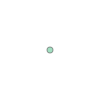

In [184]:
s.values[0]

In [192]:
len(lines)

25585

In [193]:
connected.shape

(25585, 1)

In [194]:
interpreted = gpd.GeoDataFrame(lines)

In [195]:
interpreted.head()

,0,1,2
0,7070-6876,290,LINESTRING (127.0276338166271 37.2468392084792...
1,7358-7456,274,LINESTRING (127.0614593660325 37.2469693133875...
2,7548-7453,259,LINESTRING (127.0839107081345 37.2650782844596...
3,6974-6876,220,LINESTRING (127.0163586827829 37.2467936930718...
4,7358-7453,171,LINESTRING (127.0614593660325 37.2469693133875...


In [196]:
interpreted.columns = ['name', 'pops', 'geometry']

In [197]:
interpreted.to_file('gis/7월3일오전이동.shp')

# 12/9

In [36]:
st = gpd.read_file('gis/지하철역격자위치.geojson')

In [37]:
st

,field_1,역 명칭,x,y,left,top,right,bottom,id,geometry
0,0,수원역 1호선,127.000050,37.265682,955606.838502,1.919045e+06,956606.838502,1.918045e+06,6876,MULTIPOINT (127.00005 37.26568)
1,1,망포역 분당선,127.056855,37.245838,960606.838502,1.917045e+06,961606.838502,1.916045e+06,7358,MULTIPOINT (127.05685 37.24584)
2,2,병점역 1호선,127.033200,37.206753,957606.838502,1.913045e+06,958606.838502,1.912045e+06,7074,MULTIPOINT (127.03320 37.20675)
3,3,성균관대역 1호선,126.971022,37.300329,952606.838502,1.923045e+06,953606.838502,1.922045e+06,6584,MULTIPOINT (126.97102 37.30033)
4,4,수원역 분당선,127.000244,37.266273,955606.838502,1.919045e+06,956606.838502,1.918045e+06,6876,MULTIPOINT (127.00024 37.26627)
...,...,...,...,...,...,...,...,...,...,...
91,91,도림천역 2호선,126.882649,37.514508,944606.838502,1.947045e+06,945606.838502,1.946045e+06,5792,MULTIPOINT (126.88265 37.51451)
92,92,신설동역 2호선,127.024918,37.574805,957606.838502,1.953045e+06,958606.838502,1.952045e+06,7034,MULTIPOINT (127.02492 37.57480)
93,93,용답역 2호선,127.050892,37.562125,959606.838502,1.952045e+06,960606.838502,1.951045e+06,7227,MULTIPOINT (127.05089 37.56212)
94,94,신답역 2호선,127.047080,37.569839,959606.838502,1.953045e+06,960606.838502,1.952045e+06,7226,MULTIPOINT (127.04708 37.56984)


In [38]:
stIds = """1713
1869
1716
1711
1846
1871
1719
4316
1712
1868
1867
1858
1717
1457
1855
1706
1715
1862
222
1724
1708
1872
1870
4307
1702
1854
4311
1865
4315
1707
4317
1857
1859
4125
4314
1866
4318
232
219
223
220
239
221
226
234
216
202
150
240
238
152
230
228
151
224
233
212
227
211
236
214
225
153
203
235
231
217
237
154
241
218
229
158
155
215
213
208
205
209
249
156
210
157
248
159
201
206
243
207
204
242
247
246
244
245
250"""

In [39]:
stIds = stIds.split("\n")

In [40]:
stIds

['1713',
 '1869',
 '1716',
 '1711',
 '1846',
 '1871',
 '1719',
 '4316',
 '1712',
 '1868',
 '1867',
 '1858',
 '1717',
 '1457',
 '1855',
 '1706',
 '1715',
 '1862',
 '222',
 '1724',
 '1708',
 '1872',
 '1870',
 '4307',
 '1702',
 '1854',
 '4311',
 '1865',
 '4315',
 '1707',
 '4317',
 '1857',
 '1859',
 '4125',
 '4314',
 '1866',
 '4318',
 '232',
 '219',
 '223',
 '220',
 '239',
 '221',
 '226',
 '234',
 '216',
 '202',
 '150',
 '240',
 '238',
 '152',
 '230',
 '228',
 '151',
 '224',
 '233',
 '212',
 '227',
 '211',
 '236',
 '214',
 '225',
 '153',
 '203',
 '235',
 '231',
 '217',
 '237',
 '154',
 '241',
 '218',
 '229',
 '158',
 '155',
 '215',
 '213',
 '208',
 '205',
 '209',
 '249',
 '156',
 '210',
 '157',
 '248',
 '159',
 '201',
 '206',
 '243',
 '207',
 '204',
 '242',
 '247',
 '246',
 '244',
 '245',
 '250']

In [41]:
st['field_1'] = stIds

In [43]:
st.head()

,field_1,역 명칭,x,y,left,top,right,bottom,id,geometry
0,1713,수원역 1호선,127.000050,37.265682,955606.838502,1.919045e+06,956606.838502,1.918045e+06,6876,MULTIPOINT (127.00005 37.26568)
1,1869,망포역 분당선,127.056855,37.245838,960606.838502,1.917045e+06,961606.838502,1.916045e+06,7358,MULTIPOINT (127.05685 37.24584)
2,1716,병점역 1호선,127.033200,37.206753,957606.838502,1.913045e+06,958606.838502,1.912045e+06,7074,MULTIPOINT (127.03320 37.20675)
3,1711,성균관대역 1호선,126.971022,37.300329,952606.838502,1.923045e+06,953606.838502,1.922045e+06,6584,MULTIPOINT (126.97102 37.30033)
4,1846,수원역 분당선,127.000244,37.266273,955606.838502,1.919045e+06,956606.838502,1.918045e+06,6876,MULTIPOINT (127.00024 37.26627)


In [50]:
stopGridPos

,정류장ID,id
0,4100048.0,7171
1,4100049.0,7171
2,4100050.0,7458
3,4100051.0,7170
4,4100052.0,7074
...,...,...
22314,4122063.0,4181
22315,4122062.0,4277
22316,4122061.0,4277
22317,4122060.0,4374


In [52]:
sliced = st[['field_1', 'id']]

In [53]:
sliced.columns = ['정류장ID', 'id']

In [56]:
sliced['정류장ID'] = sliced['정류장ID'].astype(float)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
concatenated = pd.concat([stopGridPos, sliced])

In [59]:
od

,승차역ID1,최종하차역ID
546060,4116729.0,4116900.0
546066,4116979.0,1714.0
546067,4116880.0,4116895.0
546072,4170253.0,4176938.0
546075,4108070.0,4116955.0
...,...,...
948634,4108045.0,4116396.0
950097,4197465.0,4151651.0
950097,4197465.0,4151651.0
950510,4130283.0,4102820.0


In [60]:
od1 = od.merge(concatenated, how='left', left_on='승차역ID1', right_on = '정류장ID')

In [62]:
od1[od1['id'].isna()]

,승차역ID1,최종하차역ID,정류장ID,id
21,8001640.0,4100131.0,NaN,NaN
62,1714.0,4112032.0,NaN,NaN
80,4102295.0,4117042.0,NaN,NaN
84,2803259.0,4807.0,NaN,NaN
107,4195496.0,4107940.0,NaN,NaN
...,...,...,...,...
140779,4113599.0,4108040.0,NaN,NaN
140942,4118404.0,4100125.0,NaN,NaN
140943,4118404.0,4100125.0,NaN,NaN
141067,9117424.0,4116753.0,NaN,NaN


In [63]:
od1 = od1.drop('정류장ID', axis=1)

In [64]:
od2 = od1.merge(concatenated, how='left', left_on='최종하차역ID', right_on = '정류장ID')

In [65]:
od2

,승차역ID1,최종하차역ID,id_x,정류장ID,id_y
0,4116729.0,4116900.0,6968.0,4116900.0,7162.0
1,4116979.0,1714.0,6299.0,NaN,NaN
2,4116880.0,4116895.0,7549.0,4116895.0,7259.0
3,4170253.0,4176938.0,7362.0,4176938.0,7268.0
4,4108070.0,4116955.0,6971.0,4116955.0,6780.0
...,...,...,...,...,...
141287,4108045.0,4116396.0,7262.0,4116396.0,7166.0
141288,4197465.0,4151651.0,7460.0,4151651.0,7170.0
141289,4197465.0,4151651.0,7460.0,4151651.0,7170.0
141290,4130283.0,4102820.0,6219.0,4102820.0,6876.0


In [66]:
od2 = od2.drop(['정류장ID'], axis=1)

In [67]:
od2

,승차역ID1,최종하차역ID,id_x,id_y
0,4116729.0,4116900.0,6968.0,7162.0
1,4116979.0,1714.0,6299.0,NaN
2,4116880.0,4116895.0,7549.0,7259.0
3,4170253.0,4176938.0,7362.0,7268.0
4,4108070.0,4116955.0,6971.0,6780.0
...,...,...,...,...
141287,4108045.0,4116396.0,7262.0,7166.0
141288,4197465.0,4151651.0,7460.0,7170.0
141289,4197465.0,4151651.0,7460.0,7170.0
141290,4130283.0,4102820.0,6219.0,6876.0


In [68]:
od2.columns = ['승차정류장', '하차정류장', '승차ID', '하차ID']

In [69]:
od_dropped = od2.dropna(subset= ['승차ID', '하차ID'])

In [70]:
od_dropped.shape

(121724, 4)

In [72]:
od.shape

(141292, 2)

In [73]:
od_dropped = od_dropped.astype(int)
od_dropped['승하차'] = od_dropped['승차ID'].astype(str) + "-" + od_dropped['하차ID'].astype(str)

In [74]:
od_dropped

,승차정류장,하차정류장,승차ID,하차ID,승하차
0,4116729,4116900,6968,7162,6968-7162
2,4116880,4116895,7549,7259,7549-7259
3,4170253,4176938,7362,7268,7362-7268
4,4108070,4116955,6971,6780,6971-6780
5,4100117,4122214,6874,6876,6874-6876
...,...,...,...,...,...
141287,4108045,4116396,7262,7166,7262-7166
141288,4197465,4151651,7460,7170,7460-7170
141289,4197465,4151651,7460,7170,7460-7170
141290,4130283,4102820,6219,6876,6219-6876


In [75]:
connected = od_dropped.groupby('승하차').size().sort_values(ascending=False)

In [76]:
from shapely.geometry import LineString

In [77]:
connected = pd.DataFrame(connected)

connected.columns = ['이동']

In [78]:
connected.head()

,이동
승하차,
7070-6876,291
7358-7456,274
7548-7453,259
6974-6876,221
7358-7453,171


In [80]:
idPoints = gpd.read_file('gis/centroids.geojson')

In [81]:
lines = []
for m in connected.index:
    temp = m.split("-")
    temp = [int(x) for x in temp]
    startP = idPoints[idPoints['id']==temp[0]]['geometry'].values[0]
    endP = idPoints[idPoints['id']==temp[1]]['geometry'].values[0]
    line = [m, connected.loc[m]['이동'], LineString((startP, endP))]
    lines.append(line)

In [82]:
lines

[['7070-6876', 291, <shapely.geometry.linestring.LineString at 0x211ef741a08>],
 ['7358-7456', 274, <shapely.geometry.linestring.LineString at 0x211ee81ca08>],
 ['7548-7453', 259, <shapely.geometry.linestring.LineString at 0x211ef2c2908>],
 ['6974-6876', 221, <shapely.geometry.linestring.LineString at 0x211f07a5f88>],
 ['7358-7453', 171, <shapely.geometry.linestring.LineString at 0x211ef2c2e88>],
 ['6877-6876', 167, <shapely.geometry.linestring.LineString at 0x211f07a8cc8>],
 ['6973-6971', 165, <shapely.geometry.linestring.LineString at 0x211f07a5688>],
 ['7359-7262', 164, <shapely.geometry.linestring.LineString at 0x211f07a8fc8>],
 ['7359-7453', 163, <shapely.geometry.linestring.LineString at 0x211f07ac988>],
 ['7459-7456', 161, <shapely.geometry.linestring.LineString at 0x211f07a8688>],
 ['7458-7456', 154, <shapely.geometry.linestring.LineString at 0x211f07a5748>],
 ['6874-6876', 153, <shapely.geometry.linestring.LineString at 0x211f07af148>],
 ['6778-6876', 148, <shapely.geometry.li

In [83]:
interpreted = gpd.GeoDataFrame(lines)
interpreted.columns = ['name', 'pops', 'geometry']
interpreted.to_file('gis/7월3일오전이동_update.shp')